שאלות המחקר המבוקשות הן:
1. מהי רמת הקורלציה בין ריכוז בבדיקות השונות, תנועה בבדיקות השונות, מבנה בבדיקות השונות.
2. האם ניתן להגיע לנוסחה מסוימת ולפיה ככלל סטיית התקן שבין שתי הבדיקות דומה פחות או יותר.
3. האם יש קשר בין מקום ביצוע בדיקת הכוסית לבין הקורלציה בנתונים השונים של הבדיקות (דהיינו האם עדיף לשלוח למקום שבו עושים הרבה בדיקות כוסית כי אז הן יהיו יותר מדויקות או שאין משמעות).
4. האם דגימה של כוסית בנפח גבוה יותר (מעל 0.5 מ"ל או מעל 1 מ"ל) נותנת נתונים אמינים יותר?

In [59]:
import xlrd
import pandas as pd
import seaborn as sns

# df = pd.read_excel("check.xls", na_values=['לא ידוע', 'אין'])
df = pd.ExcelFile("https://github.com/aviadm24/jupyter/blob/master/check.xls?raw=true")
df = pd.read_excel(df, na_values=['לא ידוע', 'אין', 'טיפה'])
df.columns = ["id", "hospital", "valume", "con_cup", "con_check", "movement_cup", "movement_check", "formation_cup", "formation_check"]
df.hospital = pd.Categorical(df.hospital)
df['code'] = df.hospital.cat.codes
df['formation_cup'] = df['formation_cup'].map(lambda x: str(x).lstrip('WHO').rstrip('WHO'))
df['formation_check'] = df['formation_check'].map(lambda x: str(x).lstrip('WHO').rstrip('WHO'))

ניקוי הדטה כדי שנוכל לעבד אותו

In [60]:
import numpy as np
import numpy.ma as ma

for index,i in enumerate(df['formation_check']):
    if isinstance(i, str):
        try:
            df['formation_check'][index] = int(i)
        except:
            pass

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


חישוב קורלציה בין ריכוז בבדיקות השונות, תנועה בבדיקות השונות, מבנה בבדיקות השונות - בכלל בתי החולים

In [61]:
corr_movement = df["movement_cup"].astype('float').corr(df["movement_check"]).astype('float')
corr_consertrat = df["con_cup"].corr(df["con_check"])
corr_formation = df["formation_cup"].astype('float').corr(df["formation_check"].astype('float'))


corr_movement:  0.6318152917636762
corr_consertrat:  0.7138309800573162
corr_formation:  0.6590311986439481


Text(0, 0.5, 'corralation')

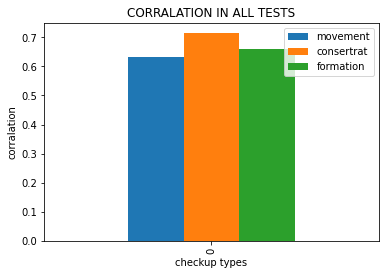

In [62]:
corrDf = pd.DataFrame()
corrDf["movement"] = [corr_movement]
corrDf["consertrat"] = [corr_consertrat]
corrDf["formation"] = [corr_formation]
print("corr_movement: ", corr_movement)
print("corr_consertrat: ", corr_consertrat)
print("corr_formation: ", corr_formation)
plt = corrDf.plot(kind='bar', title = "CORRALATION IN ALL TESTS")
plt.set_xlabel("checkup types")
plt.set_ylabel("corralation")  

השוואה של תזוזה בבדיקות כוסית ומבחנה

In [63]:
plotDf = pd.DataFrame()
plotDf["moveCup"] = df["movement_cup"]
plotDf["moveCheck"] = df["movement_check"]
plotDf

,moveCup,moveCheck
0,0.0001,0.0001
1,25.0000,20.0000
2,38.0000,20.0000
3,30.0000,55.0000
4,40.0000,40.0000
...,...,...
120,0.0000,0.0000
121,36.0000,50.0000
122,54.0000,36.0000
123,26.0000,20.0000


Text(0, 0.5, 'number of tests made')

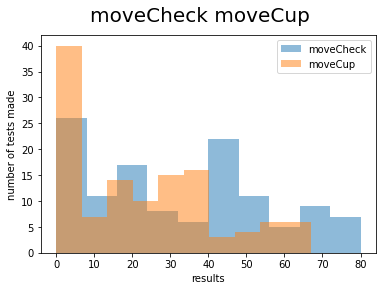

In [64]:
import matplotlib.pyplot as plt
title = ''
for col in ["moveCheck","moveCup"]:
    plt.hist(plotDf[col], alpha=0.5, label=col)
    title+=col + ' '
plt.suptitle(title, fontsize=20)
plt.legend(loc="upper right")
plt.xlabel("results")
plt.ylabel("number of tests made")  

In [65]:
title = ''
plotDf = df[["formation_check","formation_cup"]].copy()
plotDf["formation_check"] = plotDf["formation_check"].astype(float)
plotDf["formation_cup"] = plotDf["formation_cup"].astype(float)
print(plotDf)


     formation_check  formation_cup
0                2.0            0.0
1                4.0            2.0
2                NaN            NaN
3                NaN           14.0
4                NaN           13.0
..               ...            ...
120              0.0            0.0
121              0.0            7.0
122              NaN            3.0
123              3.0            2.0
124              9.0            NaN

[125 rows x 2 columns]


Text(0, 0.5, 'number of tests made')

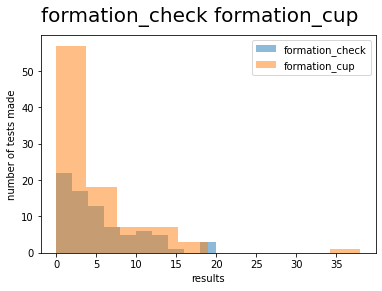

In [66]:
for col in ["formation_check","formation_cup"]:
    plt.hist(plotDf[col], alpha=0.5, label=col)
    title+=col + ' '
plt.suptitle(title, fontsize=20)
plt.legend(loc="upper right")
plt.xlabel("results")
plt.ylabel("number of tests made")  

Text(0, 0.5, 'number of tests made')

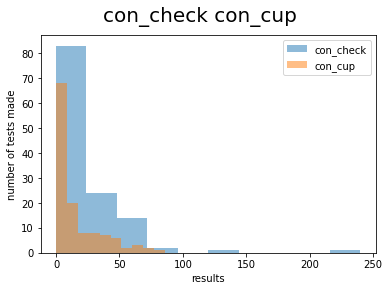

In [67]:
title = ''
plotDf = df[["con_check","con_cup"]].copy()
plotDf["con_check"] = plotDf["con_check"].astype(float)
plotDf["con_cup"] = plotDf["con_cup"].astype(float)
for col in ["con_check","con_cup"]:
    plt.hist(plotDf[col], alpha=0.5, label=col)
    title+=col + ' '
plt.suptitle(title, fontsize=20)
plt.legend(loc="upper right")
plt.xlabel("results")
plt.ylabel("number of tests made")  

השוואה של קורלציה לפי בית חולים - בוטל

In [68]:
# move_list = []
# consert_list = []
# formation_list = []
# group_names = df.hospital.unique()
# for i, name in enumerate(group_names):
# # for i in range(len(df.groupby(['hospital']))):
#     hospital = df.groupby(['hospital']).get_group(name)
#     print("number ", i, "is ", name)
# # for i in range(len(df.groupby(['code']).groups)):
#     # hospital_acher = df.groupby(['code']).get_group(i)
#     corr_movement = hospital["movement_cup"].corr(hospital["movement_check"])
#     corr_consertrat = hospital["con_cup"].corr(hospital["con_check"])
#     corr_formation = hospital["formation_cup"].astype('float').corr(hospital["formation_check"].astype('float'))
#     move_list.append(corr_movement)
#     consert_list.append(corr_consertrat)
#     formation_list.append(corr_formation)
# corr_df = pd.DataFrame()
# corr_df["corr_movement"] = move_list
# corr_df["corr_consertrat"] = consert_list
# corr_df["corr_formation"] = formation_list
# corr_df.plot()

רואים שבבית החולים ביקור חולים יש הבדל גדול בקורלציה בין התזוזה לבין מבנה וריכוז

**קורלציה לפי נפח**

In [69]:
# group_names = df.hospital.unique()
# def plotCorrByHospital(df):
#   for name in group_names:
#   # for i in range(len(df.groupby(['hospital']))):
#     hospital_number = df.groupby(['hospital']).get_group(name)
#     corr_movement = hospital_number["movement_cup"].corr(hospital_number["movement_check"])
#     corr_consertrat = hospital_number["con_cup"].corr(hospital_number["con_check"])
#     corr_formation = hospital_number["formation_cup"].astype('float').corr(hospital_number["formation_check"].astype('float'))
#     corr_df = pd.DataFrame()
#     corr_df["corr_movement"] = [corr_movement]
#     corr_df["corr_consertrat"] = [corr_consertrat]
#     corr_df["corr_formation"] = [corr_formation]
#     plt = corr_df.plot(kind="bar", title = name)
#     plt.set_xlabel("x label")
#     plt.set_ylabel("y label")
# plotCorrByHospital(df)

def getCorrAndPlot(df, **kwargs):
  print(kwargs)
  corr_movement = df["movement_cup"].corr(df["movement_check"])
  corr_consertrat = df["con_cup"].corr(df["con_check"])
  corr_formation = df["formation_cup"].astype('float').corr(df["formation_check"].astype('float'))
  corr_df = pd.DataFrame()
  corr_df["corr_movement"] = [corr_movement]
  corr_df["corr_consertrat"] = [corr_consertrat]
  corr_df["corr_formation"] = [corr_formation]
  print("corr_movement: ", corr_movement)
  print("corr_consertrat: ", corr_consertrat)
  print("corr_formation: ", corr_formation)

  plt = corr_df.plot(kind="bar", title = kwargs['name'])
  plt.set_xlabel("types")
  plt.set_ylabel("corralation")  

In [70]:
df['valume'] = df['valume'].astype(float)

השוואת קורלציה כשהנפח מתחת ל 0.5

{'name': 'underPoint5'}
corr_movement:  0.640967971641035
corr_consertrat:  0.8388417731572245
corr_formation:  0.9318235690869403


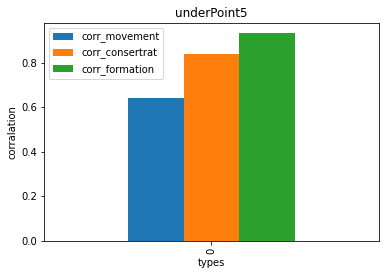

In [71]:
getCorrAndPlot(df[df.valume < 0.5], name="underPoint5")

{'name': 'overPoint5'}
corr_movement:  0.6497386957976239
corr_consertrat:  0.7372564666096049
corr_formation:  0.6099535186574766


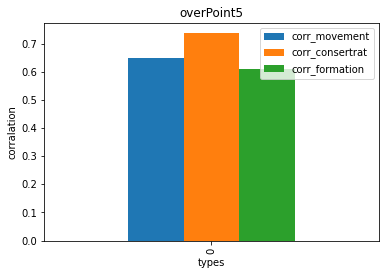

In [72]:
getCorrAndPlot(df[df.valume >= 0.5], name="overPoint5")


{'name': 'over1'}
corr_movement:  0.6861672062037045
corr_consertrat:  0.8380382934578277
corr_formation:  0.655500134101425


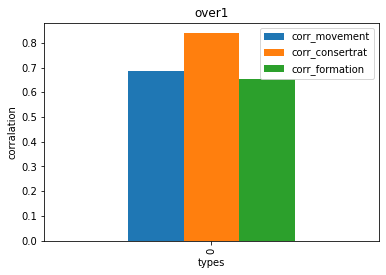

In [73]:
getCorrAndPlot(df[df.valume >= 1], name="over1")